In [2]:
import numpy as np
import pandas as pd

train_set = pd.read_csv('train.csv')
test_set = pd.read_csv('test.csv')

print(train_set.shape)
print(test_set.shape)

(891, 12)
(418, 11)


In [3]:
train_set = train_set.drop('Name', axis = 1)
test_set = test_set.drop('Name', axis = 1)

In [4]:
train_set = train_set.drop('Ticket', axis = 1)
test_set = test_set.drop('Ticket', axis = 1)

In [5]:
train_set = train_set.drop('Cabin', axis = 1)
test_set = test_set.drop('Cabin', axis = 1)

In [6]:
#in looking at data it seems like fare would be important, but I want to bin it to get a bit more general

print('min:', train_set['Fare'].min(), 
'max:', train_set['Fare'].max(),
'mean:', train_set['Fare'].mean())

fare_bins = [0, 9, 19, 49, 79, 99, 199, 515]
fare_names = ["1", "2", "3", "4", "5", "6", "7"]

binned_fares = pd.cut(train_set['Fare'], fare_bins, labels = fare_names)
print(binned_fares.head)
print(np.unique('binned_fares'))



min: 0.0 max: 512.3292 mean: 32.204207968574636
<bound method NDFrame.head of 0      1
1      4
2      1
3      4
4      1
      ..
886    2
887    3
888    3
889    3
890    1
Name: Fare, Length: 891, dtype: category
Categories (7, object): ['1' < '2' < '3' < '4' < '5' < '6' < '7']>
['binned_fares']


In [7]:
binned_fares_test = pd.cut(test_set['Fare'], fare_bins, labels = fare_names)
test_set['binned_fares'] = binned_fares_test
print(test_set.head(5))

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0          892       3    male  34.5      0      0   7.8292        Q   
1          893       3  female  47.0      1      0   7.0000        S   
2          894       2    male  62.0      0      0   9.6875        Q   
3          895       3    male  27.0      0      0   8.6625        S   
4          896       3  female  22.0      1      1  12.2875        S   

  binned_fares  
0            1  
1            1  
2            2  
3            1  
4            2  


In [8]:
train_set['binned_fares'] = binned_fares
train_set.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,binned_fares
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,4
2,3,1,3,female,26.0,0,0,7.9250,S,1
3,4,1,1,female,35.0,1,0,53.1000,S,4
4,5,0,3,male,35.0,0,0,8.0500,S,1


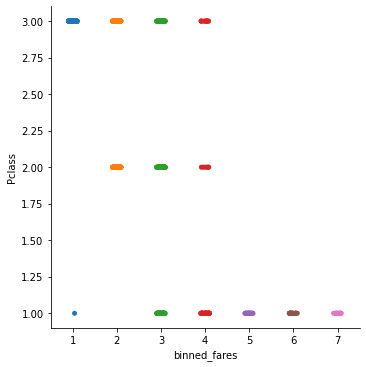

In [9]:
import seaborn as sns

sns.catplot(x= 'binned_fares', y = 'Pclass', data = train_set, col_order =['1, 2, 3, 4, 5, 6, 7'])


In [10]:
#binned ages

age_bins = [0, 4, 9, 19, 29, 39, 49, 59, 100]
age_names = ["1", "2", "3", "4", "5", "6", "7", "8"]

binned_ages = pd.cut(train_set['Age'], age_bins, labels = age_names)
print(binned_ages.head)
print(np.unique('binned_ages'))


train_set['binned_ages'] = binned_ages
train_set.head(5)
print(type(train_set))

<bound method NDFrame.head of 0        4
1        5
2        4
3        5
4        5
      ... 
886      4
887      3
888    NaN
889      4
890      5
Name: Age, Length: 891, dtype: category
Categories (8, object): ['1' < '2' < '3' < '4' < '5' < '6' < '7' < '8']>
['binned_ages']
<class 'pandas.core.frame.DataFrame'>


In [11]:
binned_ages_test = pd.cut(test_set['Age'], age_bins, labels = age_names)
test_set['binned_ages'] = binned_ages_test
print(test_set.head(5))

   PassengerId  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  \
0          892       3    male  34.5      0      0   7.8292        Q   
1          893       3  female  47.0      1      0   7.0000        S   
2          894       2    male  62.0      0      0   9.6875        Q   
3          895       3    male  27.0      0      0   8.6625        S   
4          896       3  female  22.0      1      1  12.2875        S   

  binned_fares binned_ages  
0            1           5  
1            1           6  
2            2           8  
3            1           4  
4            2           4  


In [12]:
import tensorflow as tf
from keras.utils import to_categorical as to_categorical

train_set_ohe= pd.get_dummies(train_set)
test_set_ohe = pd.get_dummies(test_set)

print(train_set_ohe.head(5))
print(test_set_ohe.head(5))

   PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  \
0            1         0       3  22.0      1      0   7.2500           0   
1            2         1       1  38.0      1      0  71.2833           1   
2            3         1       3  26.0      0      0   7.9250           1   
3            4         1       1  35.0      1      0  53.1000           1   
4            5         0       3  35.0      0      0   8.0500           0   

   Sex_male  Embarked_C  ...  binned_fares_6  binned_fares_7  binned_ages_1  \
0         1           0  ...               0               0              0   
1         0           1  ...               0               0              0   
2         0           0  ...               0               0              0   
3         0           0  ...               0               0              0   
4         1           0  ...               0               0              0   

   binned_ages_2  binned_ages_3  binned_ages_4  binned_ages_5 

In [13]:
print(type(train_set_ohe))
print(train_set_ohe.shape)
print(test_set_ohe.shape)

<class 'pandas.core.frame.DataFrame'>
(891, 27)
(418, 26)


In [14]:
labels = np.array(train_set_ohe['Survived'])

features = train_set_ohe.drop('Survived', axis = 1)
features = np.array(features)


In [15]:
import sklearn
from sklearn.impute import SimpleImputer
feature_imputer = SimpleImputer(strategy = 'mean')
imputed_features = feature_imputer.fit_transform(features)

In [16]:
test_imputer = SimpleImputer(strategy = 'mean')
imputed_testing = test_imputer.fit_transform(test_set_ohe)


In [17]:
test_pass_id = test_set['PassengerId']

In [18]:
import sklearn
from sklearn.model_selection import train_test_split


train_features, valid_features, train_labels, valid_labels = sklearn.model_selection.train_test_split(imputed_features, labels, test_size = 0.2, random_state = 13 )


In [19]:
print('training features shape:', train_features.shape)
print('training labels shape:', train_labels.shape)
print('validation features shape:', valid_features.shape)
print('validation labels shape:', valid_labels.shape)

training features shape: (712, 26)
training labels shape: (712,)
validation features shape: (179, 26)
validation labels shape: (179,)


In [20]:
#training
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10000, random_state = 3)

rfc.fit(train_features, train_labels)


RandomForestClassifier(n_estimators=10000, random_state=3)

In [21]:
from sklearn.model_selection import cross_val_score
cv_results = cross_val_score(rfc, valid_features, valid_labels, cv = 5, scoring = 'roc_auc')
print(cv_results)


[0.84415584 0.81168831 0.81493506 0.80844156 0.9020979 ]


In [23]:
survive_pred = rfc.predict(imputed_testing)

In [27]:
print(survive_pred)
print(type(survive_pred))

[0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1 1 1 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 1
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0
 1 1 0 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 1 1
 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 1
 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 0 0 0 1 1
 0 1 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 0
 0 1 1 1 1 0 0 1 0 0 0]
<class 'numpy.ndarray'>


In [29]:
print(type(test_pass_id))
test_pass_id_np = np.array(test_pass_id)
print(type(test_pass_id_np))

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [31]:
#concat arrays

from numpy import reshape

survive_pred_t = survive_pred.reshape(418, 1)
test_pass_id_t = test_pass_id_np.reshape(418, 1)
survive_pred_df = pd.DataFrame({'Survived': [survive_pred_t]})
test_pass_id_df = pd.DataFrame({'PassengerId': [test_pass_id_t]})
survive_pred_df
submission_array = np.column_stack((test_pass_id_t, survive_pred_t))
submission_df = pd.DataFrame(submission_array, columns = ['PassengerId', 'Survived'])
submission_df
submission_df.to_csv('submission_three.csv', index=False)